In [1]:
import pandas as pd
import numpy as np
import random
import seaborn as sns

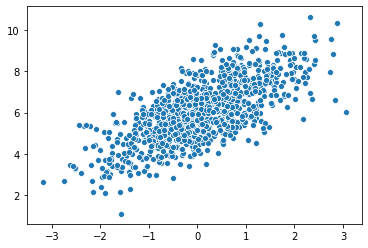

In [2]:
random.seed(999)
x = np.random.normal(size=1000) 
y = x + 6 + np.random.normal(size=1000)
sns.scatterplot(x, y)

## 1. OLS

## 1.1 Derivation


$$ 
\hat{y} = m*x + c \\
rss = error = {\sum(y - \hat{y})^2} \\
$$
We need to minimize the residual sum of sqaures error with respect to m, c. Take partial derivative of error wrt m, c & equate it to zero to solve for m, c \
Partial derivate with c: $$\frac{\partial error}{\partial c} = 2{\sum(y - m*x - c)} = 0 $$
$$ \sum( y - m* x - c) = 0 $$
$$ \bar y*N - m*\bar x*N - N*c = 0 $$
$$ \bar y - m*\bar x - c = 0 $$
$$ \boxed {c = \bar y - m*\bar x} $$

Partial derivate with m: $$\frac{\partial error}{\partial m} = 2{\sum(y - m*x - c)*x} = 0 $$
$$ \sum(yx - m*x^2 - cx) = 0 $$
$$ \sum(yx - m*x^2 - \bar yx + m*\bar x x) = 0 $$
$$ \boxed {m = \frac{\sum x(y - \bar y)} {\sum x(x - \bar x)}} $$

__Note__:       
1. OLS tries to minimize RSS (without N in denominator). Although you can choose other similar error parameter as well.

## 1.2 Practical

In [3]:
## OLS Approach
xmean = np.mean(x)
ymean = np.mean(y)
m_numerator = np.dot(x.T, (y - ymean))
m_denominator = np.dot(x.T, (x - xmean))
m = m_numerator/m_denominator
c = ymean - m*xmean
print(f"c : {round(c,3)}, m : {round(m, 3)}")

c : 5.989, m : 1.009


In [4]:
## Validating with python libraries
import statsmodels.api as sm
df = pd.DataFrame(list(zip(x, y)), columns =['x', 'y'])
ols = sm.OLS.from_formula('y~x', df)
ols_result = ols.fit()
print(ols_result.summary())

OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.492
Method:                 Least Squares   F-statistic:                     967.4
Date:                Fri, 19 Jun 2020   Prob (F-statistic):          4.87e-149
Time:                        08:59:09   Log-Likelihood:                -1437.2
No. Observations:                1000   AIC:                             2878.
Df Residuals:                     998   BIC:                             2888.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.9887      0.032    185.590      0.000       5.925       6.052
x

In [5]:
## Through Sklearn
from sklearn import linear_model
lm = linear_model.LinearRegression()
lm.fit(x.reshape(-1,1), y)
print(f"c : {round(lm.intercept_,3)}, m : {round(lm.coef_[0], 3)}")

c : 5.989, m : 1.009


## 2. Gradient Descent

## 2.1 Derivation
### 2.1.1 Non-Matrix Form

$$ error = \sum (y -m*x - c)^2 $$
Gradient Update of m : $$ m = m - alpha*\frac{\partial error}{\partial m} $$
$$ \frac{\partial error}{\partial m} = \sum (y - m*x - c)*x $$
$$ \boxed {m = m + \frac{alpha}{n}*(y - m*x - c)^T\cdot x} $$
Gradient Update of c : $$ c = c - alpha*\frac{\partial error}{\partial c} $$
$$ \frac{\partial error}{\partial c} = \sum (y - m*x - c) $$
$$ \boxed {c = c + \frac{alpha}{n}*\sum(y - m*x - c)} $$

**Notes**   
    1. *Remember dot product is equaivalent to summing after multiplaction. Thats why there is no summation in m derivation*    
    2. *alpha/n is made to ensure the values are within the range. Without n, the values blow up. (check c)*

c : 5.881, m : 1.009


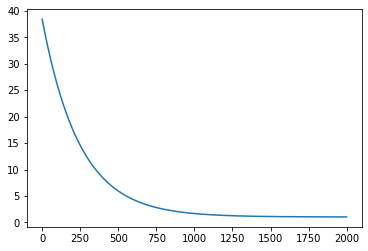

In [6]:
m = 0
c = 0
alpha= 0.001  
num_iterations = 2000  
n = len(x) 
cost = []
# Performing Gradient Descent 
for i in range(num_iterations): 
    y_hat = m*x + c  # The current predicted value of Y
    D_m = (-2/n) * sum(x * (y - y_hat))  # Derivative wrt m
    D_c = (-2/n) * sum(y - y_hat)  # Derivative wrt c
    m = m - alpha* D_m  # Update m
    c = c - alpha* D_c  # Update c
    cost.append(np.sum(np.square(y - y_hat))/n)
print(f"c : {round(c,3)}, m : {round(m, 3)}")
sns.lineplot(np.arange(0,num_iterations), cost)

### 2.1.2 Matrix Form

Redoing the same thing in matrix form
\begin{equation}
\theta = \begin{pmatrix} m \\ c \end{pmatrix}
\end{equation}
To add bias term x0 into x1 and generating X
\begin{equation} 
X = \begin{pmatrix} 1 & x \end{pmatrix} 
\end{equation}

Size of X : n, 2 (n - number of examples, 2 - one variable, one bias)    
Size of theta : 1,2 (c, m)     
Size of x, y : n,1
$$\hat{y} = X\cdot\theta^T$$
$$ error = \frac{\sum(y - \hat{y})^2}{n}$$
$$ \frac{\partial{error}}{\partial{m}} = \sum(y - \hat{y})*x $$
$$ \frac{\partial{error}}{\partial{c}} = \sum(y - \hat{y}) $$
$$ \frac{\partial{error}}{\partial{\theta}} = \sum(y - \hat{y})*X $$
$$ \frac{\partial{error}}{\partial{\theta}} = (y - \hat{y})^T\cdot X $$
$$ \boxed{\theta = \theta + \frac{alpha}{n}*(y - \hat{y})^T\cdot X} $$
$$ cost = 1/n*\sum(y - \hat y)^2 $$

You choose initial values for m, c and alpha. Then iterate the loop, check the cost over iterations, stop at minimal cost    
**Notes**    
1. During gradient update, you add the gradient to the parameter & not subtract. If subtract the cost func diverges.   
2. During gradient update, you can multiply the gradient by 2 or leave it to 1. You will converge to result if eventually
3. Check for matrix dimensions during development. 
4. The cost function is nothing but Residual Sum of Squares
5. Gradient Descent output need not be exactly equal to OLS. It is


c : 5.881, m : 1.009


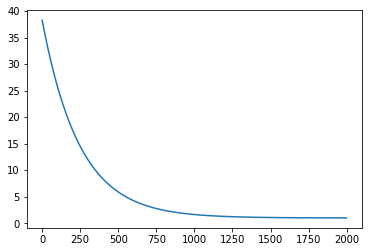

In [7]:
# alpha = 0.001
# n = len(x)
# num_iterations = 2000
y = y.reshape(-1,1)
cost = []
theta = np.zeros(shape = (1,2))
X = np.c_[np.ones((n,1)), x]
for i in range(num_iterations):
    y_hat = np.dot(X, theta.T)
    error = y - y_hat
    grad_theta = np.dot(error.T, X)
    theta = theta + 2/n*alpha*grad_theta
    cost_i = 1/n*sum(np.square(np.dot(X, theta.T) - y))
    cost.append(cost_i[0])
theta = np.concatenate(theta, axis = 0)
print(f"c : {round(theta[0],3)}, m : {round(theta[1], 3)}")
sns.lineplot(np.arange(0,num_iterations), cost)